In [2]:
import json
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pathlib import Path
import torch as th

%load_ext autoreload
%autoreload 2
from time import time
from coolname import generate_slug

def load_dict(file):
    with open(file, "r") as f:
        json_dic = json.load(f)
    return json_dic

In [4]:
from src.display_utils import plot_ci


def plot_dict(
    json_dic,
    title="",
    skip=[],
    colors=None,
    ax=None,
    do_y_label=True,
    do_probs_hor=True,
    baseline_colors=None,
    legend=True,
    save_png=False,
):
    fig = None
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 5))

    if colors is None:
        colors = sns.color_palette("tab10", len(json_dic) + 1)
    colors_it = iter(colors)
    if baseline_colors is None:
        baseline_colors = [colors[0], colors[3] if len(colors) > 3 else colors[1]]
    first = True
    for latent_lang in json_dic.keys():
        if "baseline" in latent_lang or latent_lang in skip:
            continue
        if "probs" in latent_lang:
            if do_probs_hor:
                is_source = "src" in latent_lang or "source" in latent_lang
                color = baseline_colors[0] if is_source else baseline_colors[1]
                ax.axhline(
                    np.mean(json_dic[latent_lang]),
                    # label=latent_lang,
                    color=color,
                    linestyle="--" if is_source else "-.",
                    alpha=0.6,
                )
            continue
        if not isinstance(json_dic[latent_lang], list):
            continue
        probs = th.tensor(json_dic[latent_lang])
        num_layers = probs.shape[1]
        plot_ci(
            ax,
            probs,
            label=latent_lang,
            color=next(colors_it),
            init=first,
            tik_step=5,
        )
        first = False
    if legend:
        ax.legend()
    ax.set_title(title)
    print(num_layers)
    ax.tick_params(labelsize=15)
    ax.set_xlabel("layer", fontsize=16)
    if do_y_label:
        ax.set_ylabel("concept probability", fontsize=16)
    ax.set_xlim(0, num_layers - 1)
    ax.set_ylim(0, 1)
    if fig is not None:
        fig.tight_layout()
    # Save the plot
    id = str(int(time())) + generate_slug(2)
    if save_png:
        path = Path(f"plots/{id}.png")
        path.parent.mkdir(parents=True, exist_ok=True)
        plt.savefig(path, dpi=300, bbox_inches="tight")
    path = Path(f"plots/{id}.pdf")
    path.parent.mkdir(parents=True, exist_ok=True)
    plt.savefig(path, dpi=300, bbox_inches="tight")
    print(f"Saved plot to {path}")
    plt.show()




def plot_file(file, title="", skip=[], **kwargs):
    json_dic = load_dict(file)
    plot_dict(json_dic, title, skip, **kwargs)

32
Saved plot to plots/1733829051industrious-seahorse.pdf


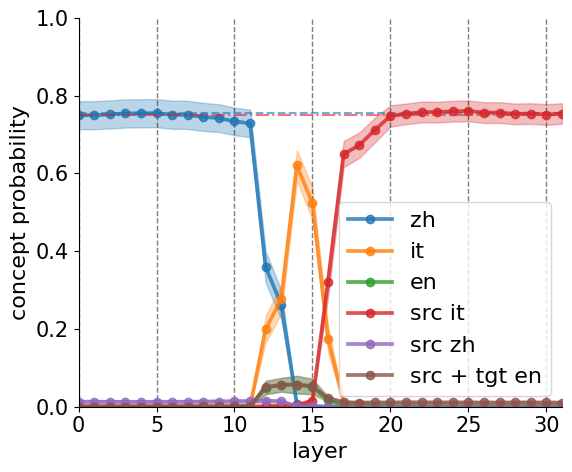

In [3]:
plot_file("results/Llama-2-7b/shifted_translation/de_it-fr_zh/1723223416_gray-crab.json")

## Mean repr defs

In [4]:
from src.plot_utils import plot_defs_comparison, plot_compare_setup

In [5]:
result_dict = load_dict("/dlabscratch1/cdumas/thinking-lang/results/aya-23-8B/mean_repr_def/hi-en_hi-fr_hi-zh_hi-de-et/1733752110_almond-avocet_defs_comparison.json")
plot_compare_setup(result_dict, Path("."))

KeyError: 'from single trans'

In [6]:
result_dict = load_dict("/dlabscratch1/cdumas/thinking-lang/results/aya-23-8B/mean_repr_def/es-fr_es-de-en/1733752110_almond-avocet_defs_comparison.json")
_ = plot_compare_setup(result_dict, Path("."))

KeyError: 'from single trans'

In [7]:
from ipywidgets import Text, Button, Output
from src.plot_utils import plot_compare_setup
result_dict = None
title_text = None
def on_button_click(b):
    global result_dict, title_text
    with output:
        output.clear_output(wait=True)
        file_path = text_box.value
        result_dict = load_dict(file_path)
        title_text = "(" + str(file_path).split("/")[-2].replace("-", ", ").replace("_", "), (") + ") " +str(file_path).split("/")[-4]
        print("using:", file_path)
text_box = Text(description='Enter file path', placeholder='/path/to/file.json')
text_box.observe(on_button_click, 'value')
button = Button(description='Plot')
button.on_click(on_button_click)
output = Output()

display(text_box)
display(button)
display(output)

Text(value='', description='Enter file path', placeholder='/path/to/file.json')

Button(description='Plot', style=ButtonStyle())

Output()

In [9]:
_ = plot_compare_setup(result_dict, title=title_text, show=True)

In [25]:
f = "/dlabscratch1/cdumas/thinking-lang/results/gemma-2-2b/debug-mean_repr_def/es-fr_es-de-en/1734100320_lush-alpaca/losses_stats.json"
dict_losses = load_dict(f)
from src.plot_utils import plot_losses_comparison
fig1, fig2 = plot_losses_comparison(dict_losses)

## Paper plots

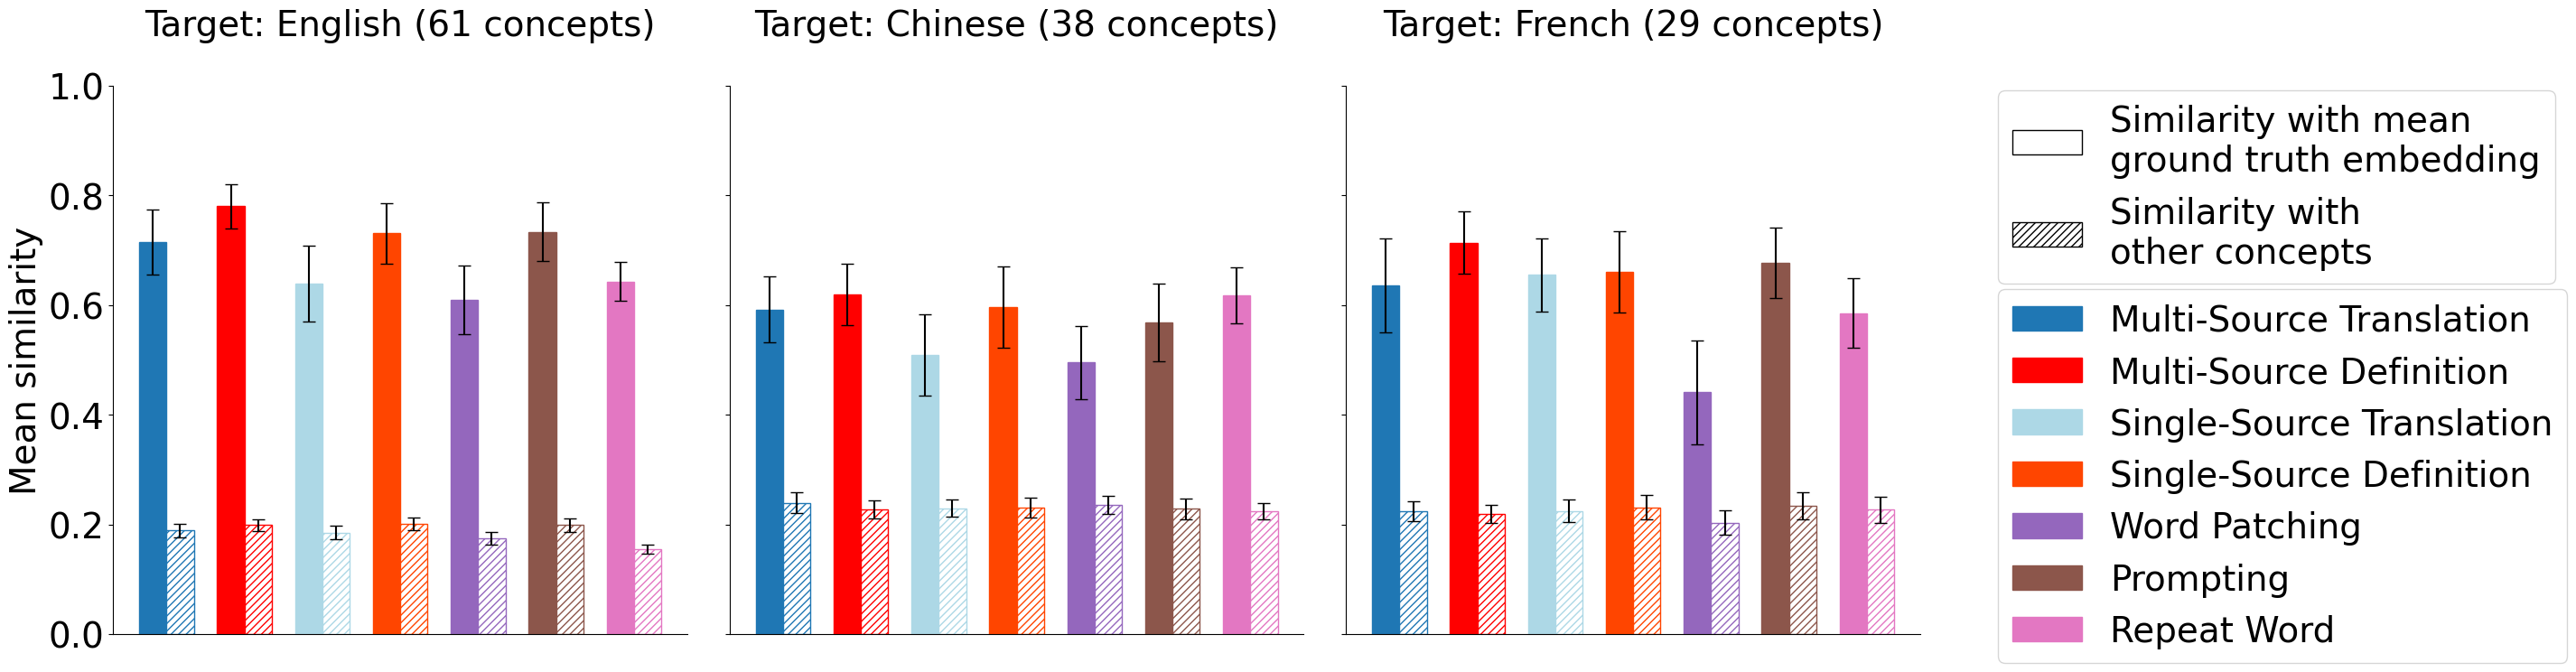

In [80]:
from plot import main_merged_no_xticks_with_legend
main_merged_no_xticks_with_legend()

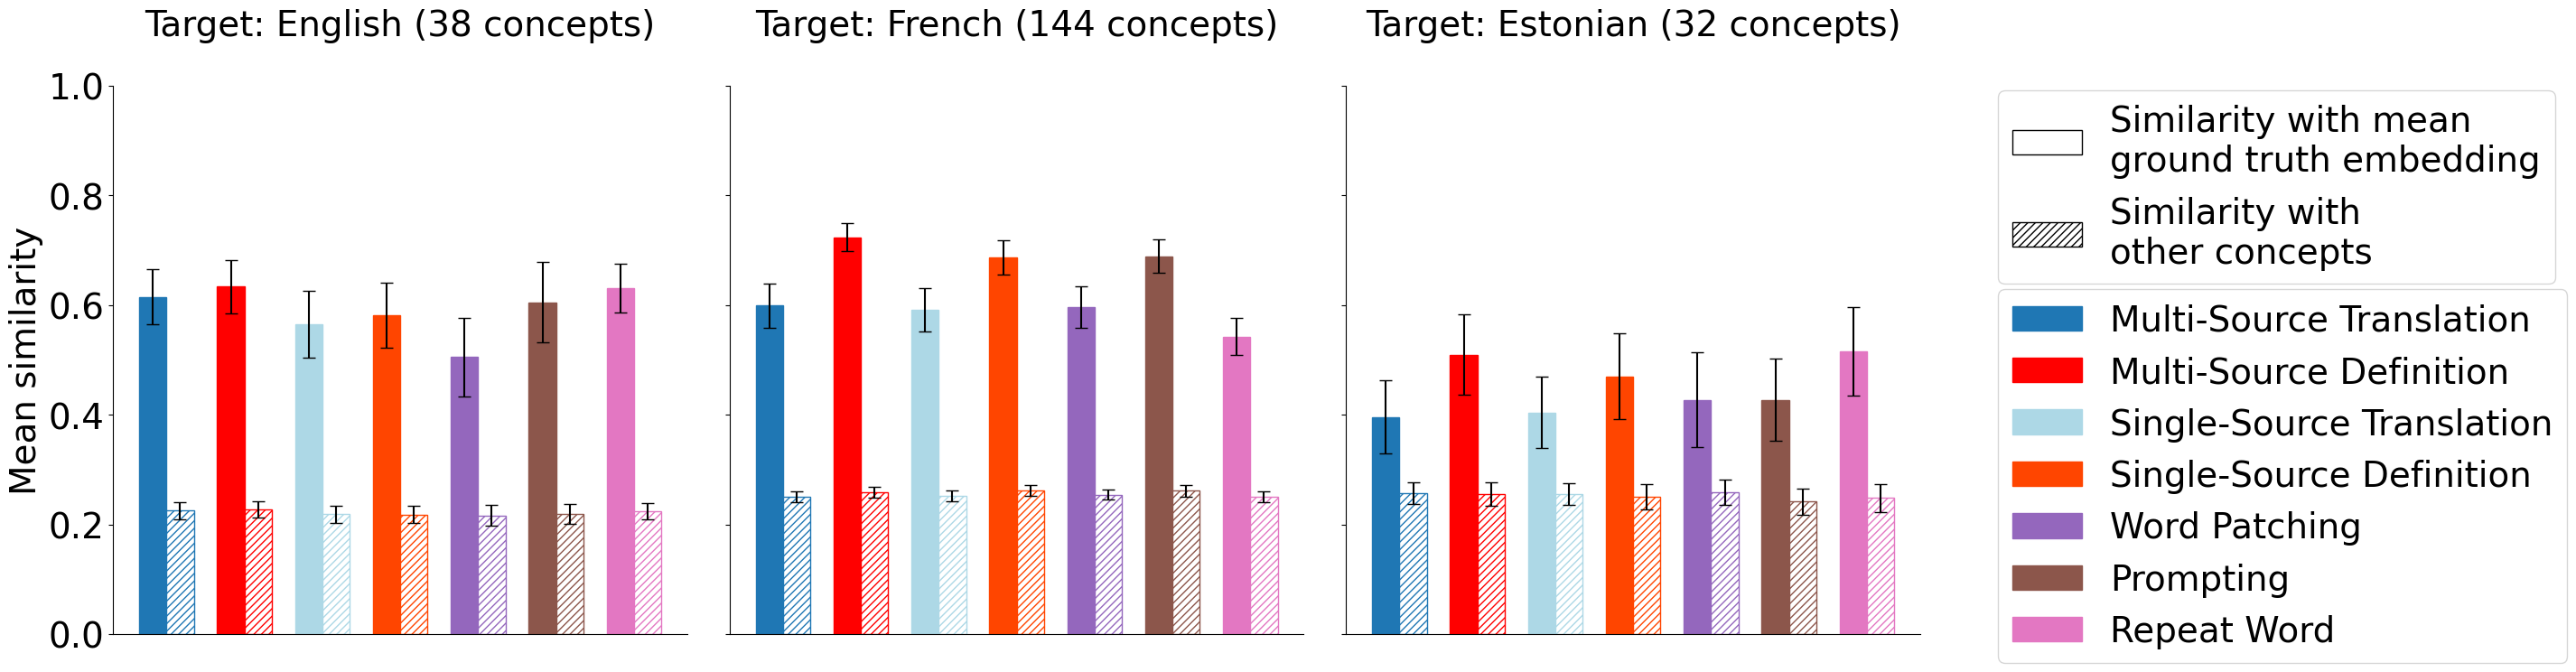

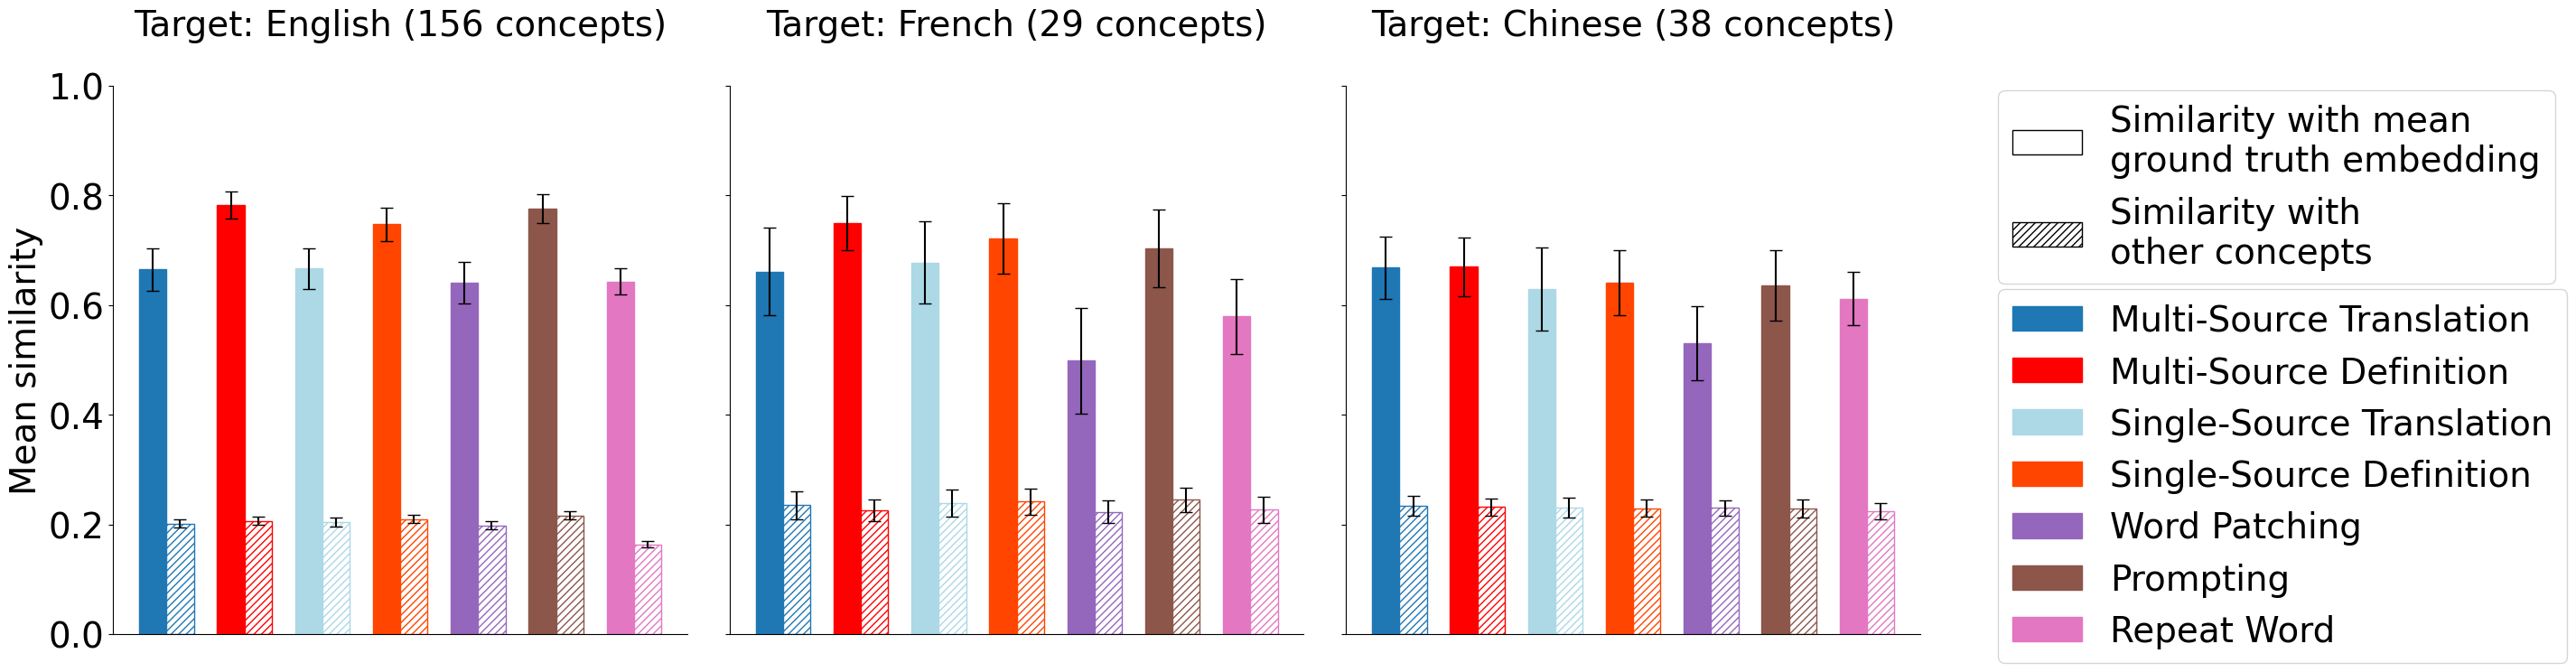

In [87]:
from src.utils import load_dict
et_file = load_dict("/dlabscratch1/cdumas/thinking-lang/results/gemma-2-2b/mean_repr_def/hi-en_hi-fr_hi-zh_hi-de-et/1733920826_neon-quail/defs_comparison.json")
en_file = load_dict("/dlabscratch1/cdumas/thinking-lang/results/gemma-2-2b/mean_repr_def/de-it_nl-fi_zh-es_es-ru_ru-ko-zh/1733920826_neon-quail/defs_comparison.json")
fr_file = load_dict("/dlabscratch1/cdumas/thinking-lang/results/gemma-2-2b/mean_repr_def/it-es_it-de-fr/1733920826_neon-quail/defs_comparison.json")
_ = main_merged_no_xticks_with_legend(datasets=[en_file, fr_file, et_file], titles=["English", "French", "Estonian"], plot_name="gemma_2_2b_similarities")
en_dict = load_dict("/dlabscratch1/cdumas/thinking-lang/results/aya-23-8B/mean_repr_def/es-fr_es-de-en/1733920835_enormous-turkey/defs_comparison.json")
fr_dict = load_dict("/dlabscratch1/cdumas/thinking-lang/results/aya-23-8B/mean_repr_def/en-ko_en-ja_en-et_en-fi-fr/1733920835_enormous-turkey/defs_comparison.json")
zh_dict = load_dict("/dlabscratch1/cdumas/thinking-lang/results/aya-23-8B/mean_repr_def/de-it_nl-fi_zh-es_es-ru_ru-ko-zh/1733920835_enormous-turkey/defs_comparison.json")
_ = main_merged_no_xticks_with_legend(datasets=[en_dict, fr_dict, zh_dict], titles=["English", "French", "Chinese"], plot_name="aya_23_8b_similarities")